In [1]:
#import matplotlib.pyplot as plt
import pickle
#from deep_networks import *
import os
import re
import fnmatch
import numpy as np
import scipy.stats
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def read_all_rotations(dirname, filebase):
    '''Read results from dirname from files matching filebase'''

    # The set of files in the directory
    files = fnmatch.filter(os.listdir(dirname), filebase)
    files.sort()
    results = []
    # Loop over matching files
    for f in files:
        fp = open("%s/%s"%(dirname,f), "rb")
        r = pickle.load(fp)
        fp.close()
        results.append(r)
    
    return results

# Training and Validation Curves

In [3]:
filebase = ("amino__epochs_50__hidden_15_10_5_drop_0.300_L2_0.000100_LR_0.001000_ntrain_03_rot_*_results.pkl") #Select this ntraining number resultsresultsList = read_all_rotations('results/P1', filebase) #Read all of those into resultsList
resultsList = read_all_rotations('results', filebase) #Read all of those into resultsList


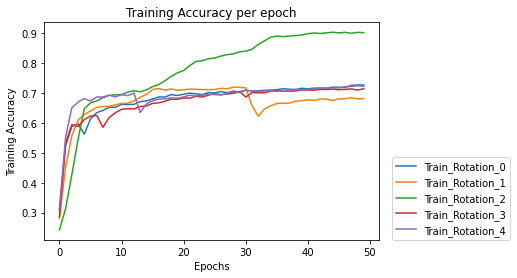

In [7]:
for i in range(len(resultsList)):
    plt.plot(resultsList[i]['history']['sparse_categorical_accuracy'], label=(("Train_Rotation_%s")%(str(i))))

plt.ylabel('Training Accuracy')
plt.xlabel('Epochs')
plt.title("Training Accuracy per epoch")
plt.legend(loc=(1.04,0))
plt.savefig('Figure1.png')
plt.show()

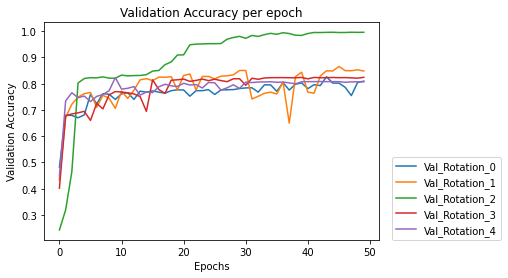

In [8]:
for i in range(len(resultsList)):
    plt.plot(resultsList[i]['history']['val_sparse_categorical_accuracy'], label=(("Val_Rotation_%s")%(str(i))))

plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.title("Validation Accuracy per epoch")
plt.legend(loc=(1.04,0))
plt.savefig('Figure2.png')
plt.show()

# Histograms of Test Results

In [9]:
def getResults(resultsList, index):
    trainList = [] # Create an empty list to hold values
    valList = [] # Create an empty list to hold values
    testList = [] # Create an empty list to hold values

    for i in range(len(resultsList)): # For each result in the 5 rotations
        trainList.append(resultsList[i]['predict_training_eval'][index]) 
        valList.append(resultsList[i]['predict_validation_eval'][index]) 
        testList.append(resultsList[i]['predict_testing_eval'][index]) 
    
    return trainList, valList, testList
    

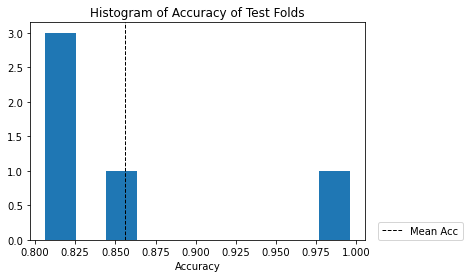

In [25]:
trainAcc, valAcc, testAcc = getResults(resultsList, 1)

plt.hist([testAcc], bins=10)
plt.axvline(np.mean(testAcc), color='k', linestyle='dashed', linewidth=1, label='Mean Acc')
plt.legend(loc=(1.04,0))
plt.xlabel('Accuracy')
plt.title("Histogram of Accuracy of Test Folds")
plt.savefig('Figure3.png')
plt.show()